## 1) The Libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as npy
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


## 2) Load Data 

In [2]:
train_images = npy.load('lego-simple-train-images.npy')
train_labels = npy.load('lego-simple-train-labels.npy')
test_images = npy.load('lego-simple-test-images.npy')
test_labels = npy.load('lego-simple-test-labels.npy')

In [3]:
# For readable humans:
class_names = ['2x3 Brick', '2x2 Brick', '1x3 Brick', '2x1 Brick', '1x1 Brick', '2x2 Macaroni', '2x2 Curved End', 'Cog 16 Tooth', '1x2 Handles', '1x2 Grill']

# Or the real Lego codes:
# class_names = ['3002', '3003', '3622', '3004', '3005', '3063', '47457', '94925', '3839a', '2412b']

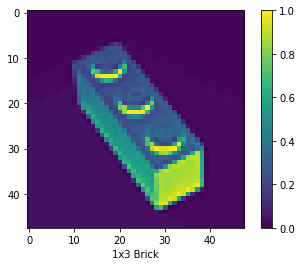

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel(class_names[train_labels[0]])
plt.show()

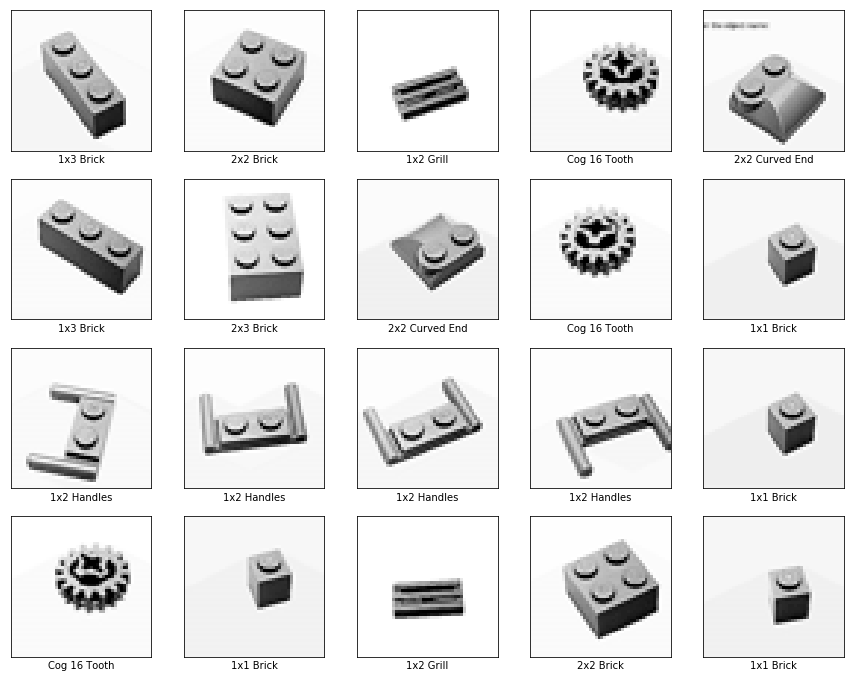

In [5]:
plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Training Tensorflow Keras

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
451/451 [==============================] - 1s 1ms/sample - loss: 1.8634 - acc: 0.3703
Epoch 2/5
451/451 [==============================] - 0s 153us/sample - loss: 0.8404 - acc: 0.8670
Epoch 3/5
451/451 [==============================] - 0s 163us/sample - loss: 0.4428 - acc: 0.9335
Epoch 4/5
451/451 [==============================] - 0s 141us/sample - loss: 0.2758 - acc: 0.9690
Epoch 5/5
451/451 [==============================] - 0s 146us/sample - loss: 0.1775 - acc: 0.9823


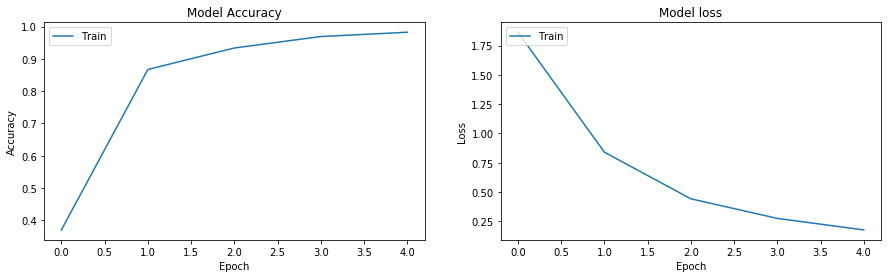

In [19]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
#plot training accuracy values
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
#plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy', test_acc)

150/150 [==============================] - 0s 125us/sample - loss: 0.2772 - acc: 0.9200
Test Accuracy 0.92


## 5) Try some Predictions

In [73]:
#function to display the image

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = npy.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    # Print a label with 'predicted class', 'probability %', 'actual class' 
    plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                         100*npy.max(predictions_array),
                                         class_names[true_label]),
                                          color=color)
    
# functions to display prediction result in a graph
    
def plot_value_array(i, predictions_array, true_label):
        predictions_array, true_label = predictions_array[i], true_label[i]
        plt.xticks(range(10))
        plt.yticks([])
        plot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1])
        predicted_label = npy.argmax(predictions_array)
        plot[predicted_label].set_color('red')
        plot[true_label].set_color('green')
        
#plot_image
plot_value_array

<function __main__.plot_value_array(i, predictions_array, true_label)>

## Single Prediction

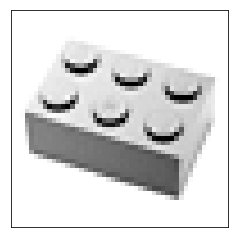

In [63]:
test_image_number = 15

img = test_images[test_image_number]
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [64]:
img = (npy.expand_dims(img,0))
img.shape

(1, 48, 48)

In [65]:
predictions_single = model.predict(img)
predictions_single

array([[9.4299400e-01, 4.8599765e-03, 2.9714815e-02, 9.6867116e-06,
        2.3814382e-06, 1.3165665e-03, 1.1770580e-03, 1.7426300e-04,
        1.9750644e-02, 5.9542828e-07]], dtype=float32)

In [66]:
prediction_result = npy.argmax(predictions_single[0])
class_names[prediction_result]

'2x3 Brick'

In [67]:
class_names[test_labels[test_image_number]]

'2x3 Brick'

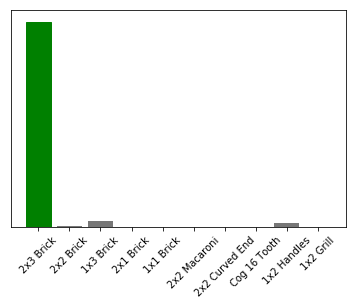

In [68]:
plot_value_array(0, predictions_single, [test_labels[test_image_number]])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

## Batch Prediction

In [69]:
predictions = model.predict(test_images)

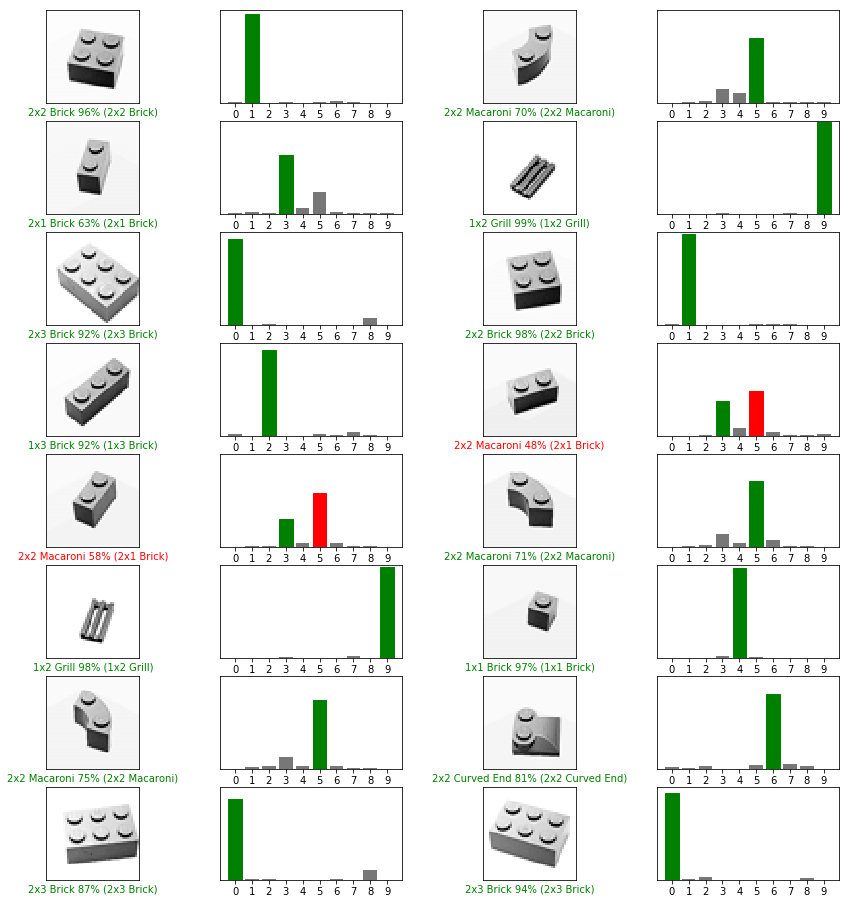

In [74]:
num_rows = 8
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(15, 16))
for i in range (num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()
